# Correlation and regression: solution #

In [38]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Correlation between variables ##

In [24]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


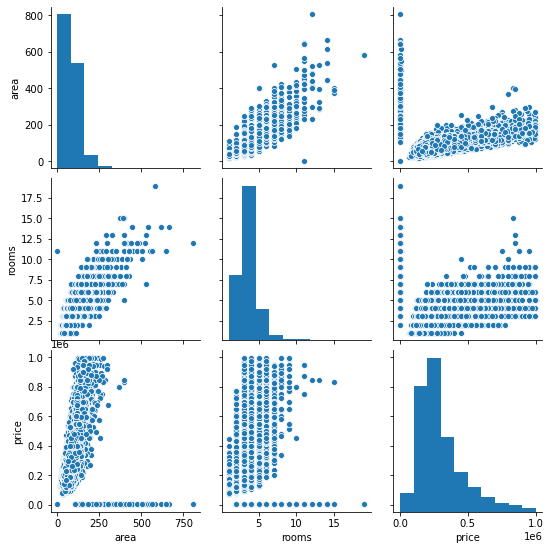

In [25]:
df_sel = df[['area', 'rooms', 'price']] #making a new dataframe with a subset
sns.pairplot(df_sel)
plt.show()

There are a few strange things happening here with some values that are equal to 0 or very small. Presumably, these are either incorrect listings or forced sales with people in debt (or something like that). Let's plot the individual variables to see what we need to cut out.

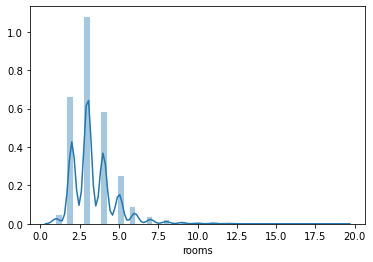

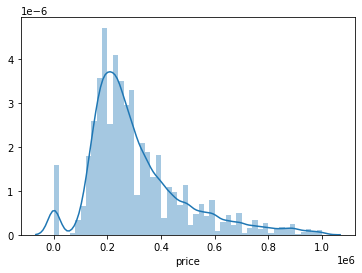

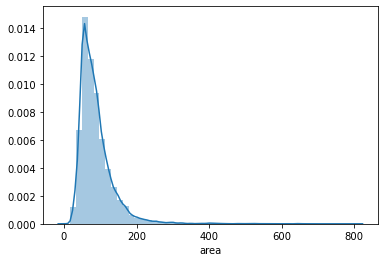

In [26]:
sns.distplot(df['rooms'])
plt.show()
sns.distplot(df['price'])
plt.show()
sns.distplot(df['area'])
plt.show()

The only thing where something really weird is going on, is price. But to be sure, let's cut out any implausible stuff if there might be any, by stating the following:

* Price above 30,000
* Area above 10 m2
* Rooms above 0

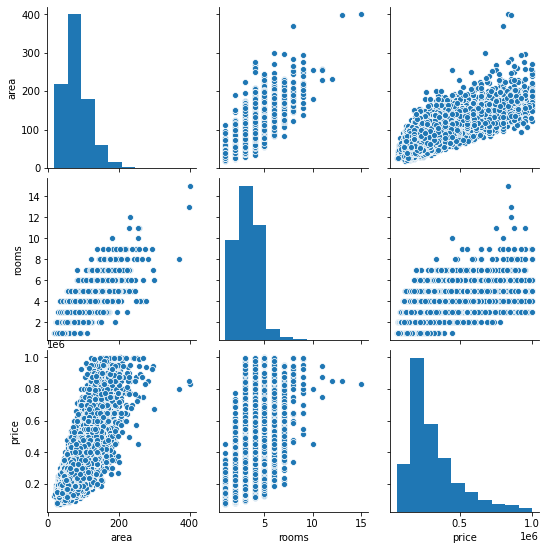

In [27]:
df = df[(df['price'] > 30000) & (df['area'] > 10) & (df['rooms'] > 0)] #we want to subset the original dataset, otherwise we lose data
df_sel = df[['area', 'rooms', 'price']]

sns.pairplot(df_sel)
plt.show()

In [28]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
print(pearsonr(df_sel['area'],df_sel['price']))

(0.7250807666953685, 0.0)


The correlation between area and price is moderately strong (*r* = 0.31) and (highly) significant (*p* < 0.001).

## Simple linear regression ##

In [29]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

x = df_sel[['area']] #to use sk-learn, we need to create lists of the two variables
y = df_sel['price']

lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list
b1 = lm.coef_[0] #gets the intercept

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") #.0f formats to 2 decimals.

The regression line is equal to y = 27983.93 + 3498.81X


Or, in Markdown: 

$y= 27983.93 + 3498.81x$

where *x* is price in euros and *y* is area in squared meters

We can now use the lm.predict method to make predictions for different values of x. For instance, x = 70:

In [30]:
lm.predict([[70]])

array([272900.93507299])

Let's print this prettier:

In [31]:
print(f"The predicted price is equal to {lm.predict([[70]])[0]:.0f} euros")

The predicted price is equal to 272901 euros


In [32]:
df['price_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(50)


,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,405855.880756
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,192428.204791
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,433846.395637
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,230915.162752
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,248409.234552
5,5,Bertrand Russellstraat 46,125,2,1097 HL,20-5-2016,515000,apartment,3,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1991,465335.724877
6,6,Admiraal De Ruijterweg 417 I,64,3,1055 ME,14-6-2016,200000,apartment,4,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,251908.048913
7,7,Deltastraat 10 -boven,155,3,1078 PC,24-5-2016,599000,apartment,5,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,570300.155680
8,8,Ben van Meerendonkstraat 49,85,2,1087 LB,21-5-2016,249000,apartment,3,10-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2007,325383.150474
9,9,Jacob van Lennepstraat 263 B,67,2,1053 JE,13-5-2016,300000,apartment,3,27-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1900,262404.491993


In [33]:
house = df[df['address']=='Slichtenhorststraat 10']
house.head()
residual = house['price_p'] - house['price'] #Subtracting Y'-Y (Y' = predicted) gets us the residual

df['resid'] = df['price'] - df['price_p']
df.head()
#I'm using int() in these statements because we need to convert the (single-item) list to a value
print(f"The house on Slichthenhorststraat was priced at {int(house['price'])}.")
print(f"The model predicted {int(house['price_p'])}.")
print(f"The residual is {int(residual)}")

The house on Slichthenhorststraat was priced at 234500.
The model predicted 426848.
The residual is 192348


## Evaluating the model ##

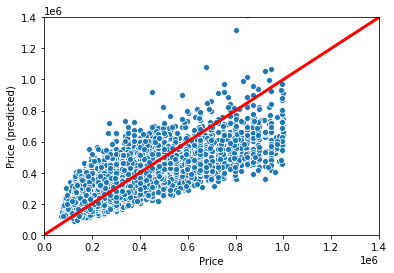

In [34]:
residual = house['price_p'] - house['price'] #Subtracting Y'-Y (Y' = predicted) gets us the residual
sns.scatterplot(x='price',y='price_p',data=df)
plt.xlim(0, 1400000) #This sets the x-axis limits to (0, 5e10 = 140000000000)
plt.ylim(0, 1400000) #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 1.5e6], [0, 1.5e6], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Price')
plt.ylabel('Price (predicted)')
plt.show()

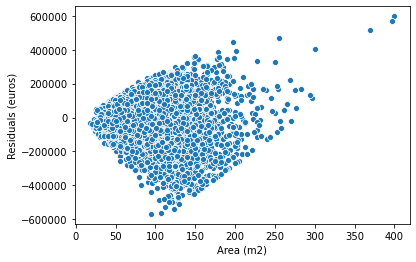

In [36]:
df['residual'] = df['price_p'] - df['price']
sns.scatterplot(x='area',y='residual',data=df)
plt.xlabel('Area (m2)')
plt.ylabel('Residuals (euros)')
plt.show()

In [39]:
r2_score(df['price'], df['price_p'])

0.5257421182315432

In [40]:
math.sqrt(mean_squared_error(df['price'], df['price_p'])) #this gives the model fit (R2) for the Y and predicted Y

118016.87861535022